# **C.L.A.S.S.**
# **C**lass **L**ocator **A**ssistant **S**orter **S**ystem

This program uses the data fed in from a set of student records and automatically sorts and formats a human-readable output.

# Inputs
*   records.csv
*   weights.csv
*   tutors.csv

# Outputs
*   {tutorial_group}.csv
*   (Optional) Automated Email attachment




# Building *weights.csv*

To build weights.csv, the schools involved in the dataset were extracted in this script.

## 3 Considerations for ways to sort dataset by school:


1.   Sorting for Uniqueness:
  *        Sorting each group to ensure that there are no 2 members from the same school to allow for more unique skillsets within the team.
2.   Sorting by Alphabetical order:
  *        Sorting each group to ensure that there are not too many members from schools starting with the same letter. (NOT RECOMMENDED😞)
3.   Sorting by Competency: ✅
  *        Sorting each group by how each member is inclined in the project/assignment given on average from a given school
  *        Data needed for accuracy pertaining to competency towards a certain subject/topic/task

> Option 3 was chosen due to its practical use in the real world on top of being a better method for sorting compared to more arbitary vectors.

However, due to option 3 requiring external input, a survey was employed to gather results for a sample test case.




In [ ]:
#lists all schools from CSV
file = open("records.csv", "r")
content = file.readlines()
#remove 1st line header
content.pop(0)

sch_to_sort = []
for i in content:
    v = i.split(",")[2]
    if v not in sch_to_sort:
        sch_to_sort.append(v)

for i in sch_to_sort:
    print(i)

file.close()

CCDS
EEE
CoB (NBS)
SoH
WKW SCI
CoE
MAE
SPMS
SBS
SSS
ASE
NIE
ADM
CCEB
MSE
LKCMedicine
CEE
HASS


#Main Sorting Program
This is the main body of the sorting algorithm.
## Functions


*   getMean()
*   culDist() //function has been removed
*   tutSplit()
*   gpaSort()
*   cumuDist()
*   qlcSort()

###*getMean(arr)*:
Calculates the mean of a list *arr*.

returns *float*

###*getSD(arr, mean)*:
Calculates standard deviation from a list *arr* and the given mean *mean*.

returns *float*

###*cumuDist(arr)*:
Calculates cumulative distribution of values in a list *arr*.

returns *list* containing cumulation of values in ascending order.

###*tutSplit(arr, tutGrps)*:
builds a record of all tutorial groups from the dataset.

returns *list* containing all tutorial groups.

###*gpaSort(arr)*:
sorts the list *arr* by ascending order of CGPA.

returns *list* containing input list *arr* with CGPAs sorted by ascending order.

###*ceiling(flt)*:
returns the ceiling value of a number; AKA rounding the value **UP** to the nearest whole number.

returns *int* containing a rounded up value.



# **S.P.L.A.T.**
# **S**ort **P**rocedures **L**eading **A**ll **T**ypes

S.P.L.A.T. is defined in the program as qlcSort.

*qlcSort(arr,mean,gpnum,confidence)*:

qlcSort is a custom 3-layer sorting algorithm that sorts the dataset by:

1.   CGPA
2.   School
3.   Gender

These 3 factors have been prioritised accordingly by significance or impact to the group composition.

## Inputs:
*arr*: *list* containing all points of data to be sorted. This can be modified to include/exclude:


*   Students of a specific Tutorial Group
*   All students within the records.csv file

*mean*: mean CGPA of the overall dataset from records.csv used as a comparison in sorting.

*gpnum*: Alloted group size as specified by the user, sorts the output of each group according to the size.

*confidence*: pseudo-"confidence level" to imitate a system similar to Z-Score functions within a dataset - in this case CGPA records - that forms a standard normal distribution.

##CGPA

The CGPA sorting component utilises a variant of Quicksort to sort each point of data into the alloted bins. Bins are scaled with a multiplier based on the input *confidence* as a percentage(%) of the given mean.

Although not a perfect representation of a normal distibution, using a shifting mean can emulate a approximation of confidence level in a dataset that is broad enough to form into a standard normal distribution.

##Best-fit 'Attenuation'

> The CGPA algorithm determines the final group size for each group, using a best fit method for getting the group outputs.

This attenuation algorithm will always create teams with a lower member count than the group size, and will also provide marginally higher mean CGPA within such groups compared to groups with the orignal group size. This is meant to make up for the lower member count and thus increased workload across each member, and a higher CGPA mean may mean that members within such smaller groups are able to handle the corresponding workloads.

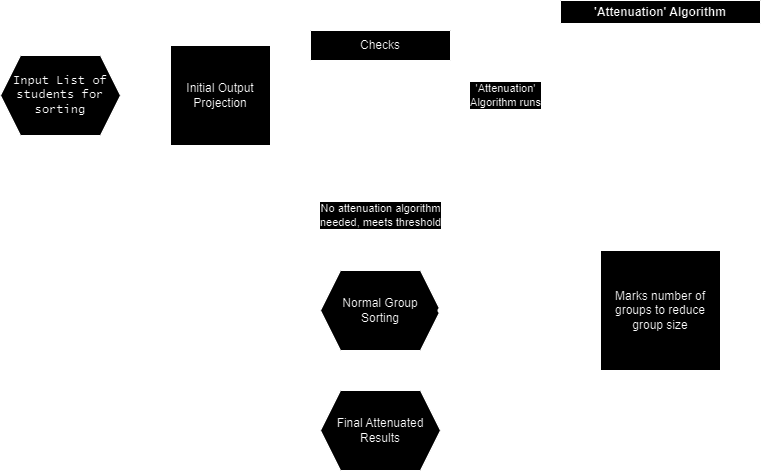

##School

The School sorting component utilises a custom sorting algorithm based on data collected.

This algorithm relies of 'weights' applied onto each school's member to determine their aptitude towards the assignment/subject/project. These factors determine the total weight of each group formed from the previous CGPA sorting algorithm, and the mean weight of the groups formed within the dataset.

The groups are sorted according to the weight mean, with higher weight groups and lower weight groups separated into bins. These bins are then selected to be swapped with the respective counterpart bins, e.g. low binned group to swap from high binned group.

>**NOTE:This sorting algorithm is meant to run ONLY ONCE, as within a group of 4-10 members, a single pass is adequate for maintaining a relatively balanced result across all groups without skewing the balanced mean CGPA per group.**

>In a standard scenario of a group size of 5, the skew of CGPA compared to the previous groupset would differ by 4%, where X is the sum of the CGPA of the original 5 members, M = 5, and the CGPA swap threshold is 20%.

    >˜f = [(X + 0.2N) / M] - (X/M)

From the same formula, applying the worst case value of M = 4 will yield a fluctuation of 5% and a best case value of M = 10 yielding a fluctuation of 2%.

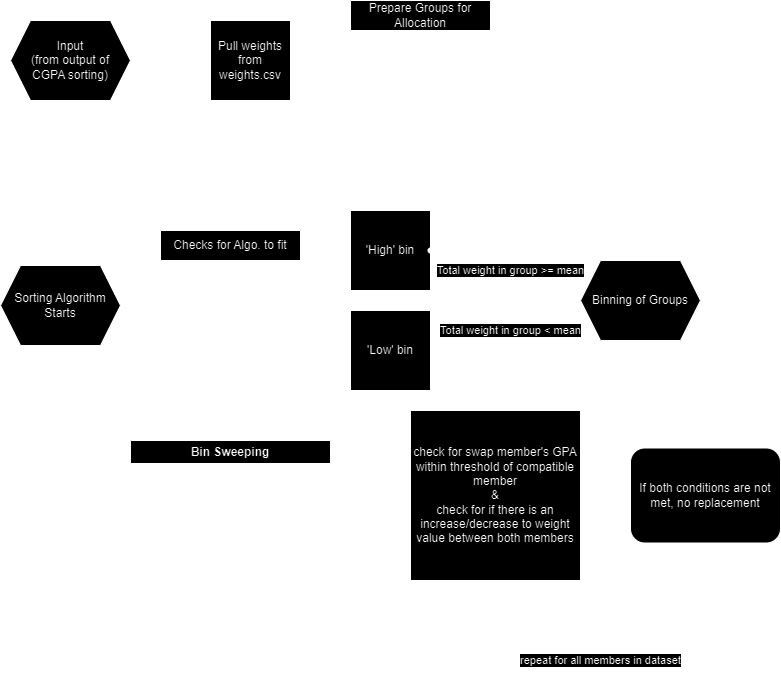


##Example weighting: Coding Proficiency/Confidence
A survey was done by the team on peers and members of different schools within NTU, and the results are tabulated to provide the example weights inserted into *weights.csv*.

This survey gets surveyees to enter their school, and their confidence in coding/programming from the scale of 1 to 10. From the results, an mean(average) proficiency rating can be obtained. This is used to numerically compare individuals from one school to another.

###Problems Faced

*   Insufficient Responses
    * There was an uneven number of surveyees from each school, causing anomalous results from an individual heavily skewing the mean towards such results.
    >As outreach of the survey is limited, most of the dataset is comprised of individuals from CCDS at 29.1% (16 persons), with ADM, SPMS, and CoE equally having the least presence of 1.8% (1 person).
    * Limited responses across the whole dataset means that the survey's reliability is impacted, where results may be similar within each school but still do not reflect the real competency/confidence of individuals within the school.
      >**From the 18 schools retrieved from *records.csv*, the team managed to only obtain responses from 13 schools. The remaining schools without responses have placeholder proficiency values from speculation and prior understanding of the course types.**
* Inadequate Survey Runtime
    * The survey duration ran for about 2.5 weeks between 22nd October and 8th November. This may have posed an issue that individuals that have received the survey did not have enough time to submit their responses, causing a deficiency during data collection.

    >As of 8th November 2024 2230Hrs, only [55] responses were tabulated into the weightage in *weights.csv*, with a mean count of [4 (4.231)] from each school. Average anomalous count stands at ~[1] per school.

The survey results have been plotted out into a scatter chart to show averages of proficiency by school as shown:

[Survey Results](example.com)

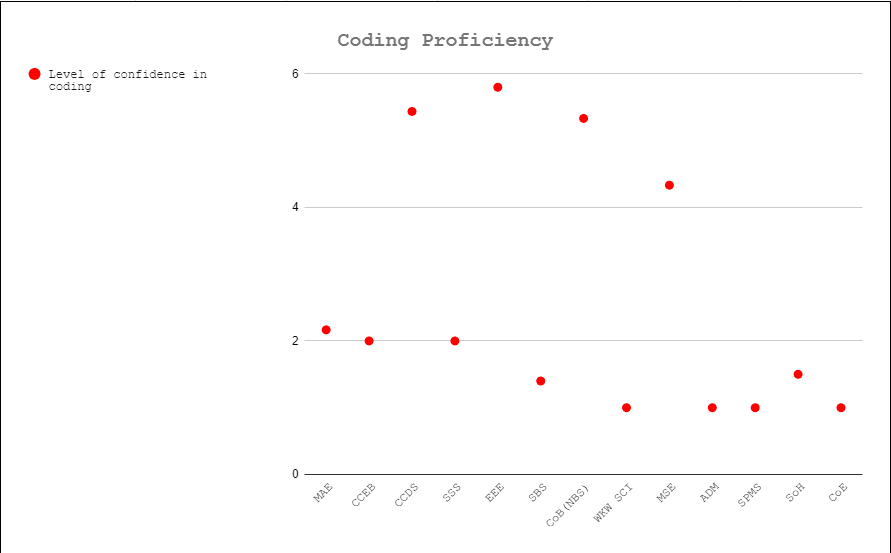

As the above chart shows, EEE has the highest average proficiency at 5.8 (0.58) and CoE, SPMS, ADM, and WKW SCI the lowest at 1 (0.1).



#Gender

The Gender sorting component utilises a similar custom sorting algorithm based on the ratio balance of *Female*👩‍🎓 : *Male*👨‍🎓. As there are only 2 variables that all members **in the dataset** fall under, the algorithm only takes into account the count of *females* in each group.

Like the School algorithm, the groups are binned into 2 groups based on their gender dominance, with a threshold of 80% dominance of 1 gender triggering the binning process for the group.

As the priority for balance of gender within the groups is the lowest, the algorithm skips the swap if a best case pair is not present within the binned groups (dominance of either gender).

>**NOTE: This sorting algorithm runs ONLY in the best case, and ONLY ONCE so as to not affect the balance of the other 2 factors.**

>In this case, 'best case' refers to a matching opposing gender swap that has similar CGPA and proficiency.

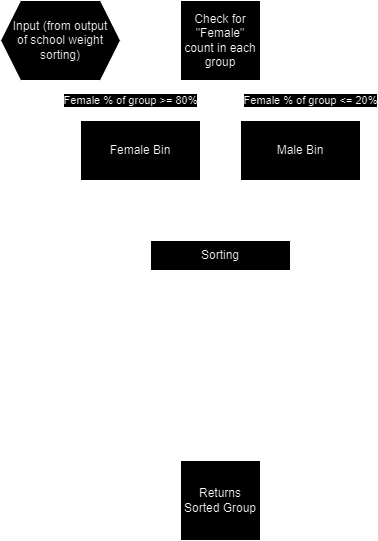

#Output

After the 3 sorting algorithms have been run, the output is presented as a *dictionary* with a group number as a key and group members within as strings within a *list*.

In [ ]:

def getMean(arr):
    return sum(arr) / len(arr)

def getSD(arr, mean):
    ara = arr.copy() #making the copy of the array in order to not mess up the original array
    for i in ara:
        i = (i - mean) ** 2 #sum of (x-mean)^2 in which x refers to a single value in a group of values
    return sum(ara) / (len(ara) - 1)

def culDist(arr):
    arb = arr.copy()
    #for i in arb:

def tutSplit(arr, tutGrps):
    arc = arr.copy()
    for i in arc:
        #sample will be [G-1,5002,CCDS,Aarav Singh,Male,4.02] as single string
        i = i.replace("\n", "")
        jarc = i.split(",")
        if jarc[0] in tutGrps:
            tutGrps.update({jarc[0] : tutGrps.get(jarc[0]) + [i]})
        else:
            tutGrps.update({jarc[0] : [i]})
    return tutGrps

def gpaSort(arr):
    ard = arr.copy()
    ard.sort(key=lambda x: x.split(",")[5])
    return ard

def cumuDist(arr):
    arf = arr.copy()
    out = []
    for v in range(len(arf)):
        w = arf[v].split(",")[5]
        if v == 0:
            out.append(float(w))
        else:
            out.append("{:.2f}".format(float(w) + float(out[v-1])))
    return out

def ceiling(flt):
    #gets ceiling of input value ret. int
    if flt - int(flt) != 0.0:
        return int(flt) + 1
    else:
        return int(flt)

#a is dict with list of each tut class

#Function to create the groups based on the number given
def qlcSort(arr, mean, gpnum, confidence):
    arh = arr.copy()
    #check for group count remainder, see if attenuation needed
    lstgrpcount = len(arh) % gpnum #last group member count
    initgrpnum = ceiling(len(arh) / gpnum) #inital number of groups by gpnum
    attenval = 0
    newteamcnt = gpnum
    if float(lstgrpcount) != 0 and float(lstgrpcount) < gpnum * 0.6:
      attencount = lstgrpcount + gpnum #total number of ppl to be displaced
      affectedteams = 2
      fitcond = False
      while fitcond == False:
          if attencount // affectedteams >= float(gpnum) * 0.6 and attencount % affectedteams == 0:
              fitcond = True
              #find num of teams before attenuation
              attenval = initgrpnum - affectedteams #team count past where it changes to attenuated value
              newteamcnt = attencount / affectedteams #new number of team members
              #print(len(arh), affectedteams, attenval, newteamcnt)
              break
          else:
              #need more groups
              affectedteams += 1
              attencount += gpnum

    low, mid, high = [], [], []
    for i in range(len(arh)):
        var = float(arh[i].split(",")[5])
        if var < mean * (1.0 - (confidence / 200)):
            low.append(arh[i])
        elif var > mean * (1.0 + (confidence / 200)):
            high.append(arh[i])
        else:
            mid.append(arh[i])

    gpcnt = 1
    groups = {i : [] for i in range(1, initgrpnum + 1)}
    for groupnum, groupmembers in groups.items():
        ratio = [len(low),len(mid),len(high)]
        mv = ratio.index(max(ratio))
        if groupnum == attenval:
          #change gpnum to attenuated value
          gpnum = newteamcnt
        if len(groupmembers) == 0:
            #first member of group
            if mv == 0:
                groupmembers.append(low[0])
                low.pop(0)
            elif mv == 1:
                groupmembers.append(mid[0])
                mid.pop(0)
            else:
                groupmembers.append(high[0])
                high.pop(0)
        while len(groupmembers) < gpnum:
            #check for mean of group and add accordingly
            try:
                if getMean([float(i.split(",")[5]) for i in groupmembers]) < mean * (1.0 - (confidence / 200)):
                    groupmembers.append(high[0])
                    high.pop(0)
                elif getMean([float(i.split(",")[5]) for i in groupmembers]) > mean * (1.0 + (confidence / 200)):
                    groupmembers.append(low[0])
                    low.pop(0)
                else:
                    groupmembers.append(mid[0])
                    mid.pop(0)
            except:
                #get ratioed again
                ratio = [len(low),len(mid),len(high)] #update it to latest
                if any(ratio):
                    mav = ratio.index(max(ratio))
                    if mav == 0:
                        groupmembers.append(low[0])
                        low.pop(0)
                    elif mav == 1:
                        groupmembers.append(mid[0])
                        mid.pop(0)
                    else:
                        groupmembers.append(high[0])
                        high.pop(0)
                else:
                  #ratio @ 0 so break
                  break;
    #print(groups)
    #sorting by school now
    weightfile = open("weights.csv", "r") #IMPLEMENT LATER !!! IMPLEMENTED WOO!!
    schweights = {}
    for i in weightfile.readlines():
        #arranged with 1 set per line --> (school,weight)
        a = i.split(",")
        schweights.update({a[0]:float(a[1])})
    weightfile.close()

    '''schweights = {"CCDS" : 1.0,
                  "EEE" : 0.9,
                  "CoB (NBS)" : 0.8,
                  "SoH" : 0.7,
                  "WKW SCI" : 0.6,
                  "CoE" : 0.5,
                  "MAE" : 0.4,
                  "SPMS" : 0.4,
                  "SBS" : 0.3,
                  "SSS" : 0.3,
                  "ASE" : 0.2,
                  "NIE" : 0.2,
                  "ADM" : 0.1,
                  "CCEB" : 0.1,
                  "MSE" : 0.1,
                  "LKCMedicine" : 0.1,
                  "CEE" : 0.1,
                  "HASS" : 0.1,
                  }'''

    teamweights = []
    #weights for competency in selected project type
    for groupnum, groupmembers in groups.items():
        teamweights.append(0.0)
        for i in range(len(groupmembers)):
            tsch = groupmembers[i].split(',')[2]
            groupmembers[i] +=  "," + str(schweights.get(tsch))
            teamweights[groupnum - 1] += schweights.get(tsch)
    #print(getMean(teamweights))

    hiwt,lwwt = [],[] #indexes of hi or low teams, actual grp no. is +1 of index within, can fix maybe? FIXED

    #split groups into hi low bins to atten.
    for wt in range(len(teamweights)):
        if teamweights[wt] < getMean(teamweights):
            lwwt.append(wt+1)
        else:
            hiwt.append(wt+1)

    hiswap, lowswap = [""] * len(hiwt) ,[""] * len(lwwt) #binned ppl to swap, arr by index of hiwt or lwwt
    #print(hiwt, lwwt)
    #print(hiswap, lowswap)
    #e.g. [1, 2, 4, 6, 9, 10] [3, 5, 7, 8] --> hiwt, lwwt
    #find which bin has lowest count, depending on which get highest/lowest sch weight score and swap with another with
    #higher or lower wt score from different sch
    if len(hiwt) > 0 and len(lwwt) > 0:
        if len(hiwt) <= len(lwwt):
            isHigh = True
            for i in hiwt:
                #high weight is lesser, so take higher weight scorers to dump into lower bins
                wtmax = 0.0
                for member in range(len(groups.get(i))):
                    #inside group, j is each person inside the grp
                    if float(schweights.get(groups.get(i)[member].split(",")[2])) > wtmax:
                        wtmax = float(schweights.get(groups.get(i)[member].split(",")[2]))
                        hiswap[hiwt.index(i)] = groups.get(i)[member]
        else:
            isHigh = False
            for i in lwwt:
                #low weight is lesser, so take lower weight scorers to dump into higher bins
                wtmin = 1.0
                for member in range(len(groups.get(i))):
                    #inside group, j is each person inside the grp
                    if float(schweights.get(groups.get(i)[member].split(",")[2])) <= wtmin:
                        wtmin = float(schweights.get(groups.get(i)[member].split(",")[2]))
                        lowswap[lwwt.index(i)] = groups.get(i)[member]

    #print(hiswap, lowswap)
    #now check for best fit in hi/low groups
    #if no, no swap
    #check if hiswap or lowswap is emptyXXXXX checks a pointer now for isHigh if is high ok okokokok
    #print(len(hiswap), len(lowswap))
    if not isHigh:
        #the groups to swap to hi to low
        for i in range(len(lwwt)):
            bkey = False
            swapgrpno = lwwt[i]
            swapmember = lowswap[i]
            for v in range(len(hiwt)):
                replacegrpno = hiwt[v]
                for replacemember in groups.get(replacegrpno):
                    if float(swapmember.split(",")[5]) * 0.8 < float(replacemember.split(",")[5]) <= float(swapmember.split(",")[5]) * 1.2:
                        if schweights.get(replacemember.split(",")[2]) < schweights.get(swapmember.split(",")[2]):
                            groups.get(replacegrpno).append(swapmember)
                            groups.get(swapgrpno).append(replacemember)
                            groups.get(replacegrpno).remove(replacemember)
                            groups.get(swapgrpno).remove(swapmember)
                            #this cycle is done, break
                            bkey = True
                            break
                if bkey:
                  bkey = False
                  break
    else:
        for i in range(len(hiwt)):
            bkey = False
            swapgrpno = hiwt[i]
            swapmember = hiswap[i]
            for v in range(len(lwwt)):
                replacegrpno = lwwt[v]
                for replacemember in groups.get(replacegrpno):
                    if float(swapmember.split(",")[5]) * 0.8 < float(replacemember.split(",")[5]) <= float(swapmember.split(",")[5]) * 1.2:
                        if schweights.get(replacemember.split(",")[2]) > schweights.get(swapmember.split(",")[2]):
                            groups.get(replacegrpno).append(swapmember)
                            groups.get(swapgrpno).append(replacemember)
                            groups.get(replacegrpno).remove(replacemember)
                            groups.get(swapgrpno).remove(swapmember)
                            #this cycle is done, break
                            bkey = True
                            break
                if bkey:
                  bkey = False
                  break

    #GENDER EQUALITY IS REAL GUYS
    #check if there are single gender teams, flag team nums
    mgps = []
    fgps = []
    for grp in range(len(groups)):
        female = 0
        if grp != 0:
            for i in groups.get(grp):
                gender = i.split(",")[4]
                if gender == "Female":
                    female += 1
            if (len(groups.get(grp)) - female) / len(groups.get(grp)) >= 0.8:
                #no gender equality!!!! male too many
                mgps.append(grp+1)
            elif (len(groups.get(grp)) - female) / len(groups.get(grp)) <= 0.2:
                #female too many
                fgps.append(grp+1)

    #print(groups)
    #sggps now contains all the groups with above 80% inequality
    print(mgps, fgps)
    #now we need to check between these groups if there are swaps from the same gpa variance + similar weight
    for sgp in mgps:
        gts = groups.get(sgp)
        tokenm = False
        for swapmem in gts:
            for gtp in fgps:
                for replacemem in groups.get(gtp):
                    if gender == "Female":
                        if float(swapmem.split(",")[5]) * 0.8 < float(replacemem.split(",")[5]) <= float(swapmem.split(",")[5]) * 1.2:
                            if float(swapmem.split(",")[6]) * 0.5 < float(replacemem.split(",")[6]) <= float(swapmem.split(",")[6]) * 1.5:
                                #swap!
                                groups.get(gtp).append(swapmem)
                                groups.get(gtp).remove(replacemem)
                                gts.remove(swapmem)
                                gts.append(replacemem)
                                tokenm = True
                                break
                if tokenm:
                  break
            if tokenm:
              tokenm = False
              break
    for sgp in fgps:
        gts = groups.get(sgp)
        tokenm = False
        for swapmem in gts:
            for gtp in mgps:
                for replacemem in groups.get(gtp):
                    if gender == "Male":
                        if float(swapmem.split(",")[5]) * 0.8 < float(replacemem.split(",")[5]) <= float(swapmem.split(",")[5]) * 1.2:
                            if float(swapmem.split(",")[6]) * 0.5 < float(replacemem.split(",")[6]) <= float(swapmem.split(",")[6]) * 1.5:
                                #swap!
                                groups.get(gtp).append(swapmem)
                                groups.get(gtp).remove(replacemem)
                                gts.remove(swapmem)
                                gts.append(replacemem)
                                tokenm = True
                                break
                if tokenm:
                  break
            if tokenm:
              tokenm = False
              break

    return groups


file1 = open("records.csv", "r")
content = file1.readlines()
#remove 1st line header
content.pop(0)

tutGrp, stuID, sch, name, gender, cgpa = [], [], [], [], [], []

for i in content:
    v = i.split(",")
    tutGrp.append(v[0])
    stuID.append(v[1])
    sch.append(v[2])
    name.append(v[3])
    gender.append(v[4])
    cgpa.append(v[5])

#close file
file1.close()

a = tutSplit(content, {})
#THIS PART IS FOR MANUAL TEST INPUTS ONLY!!!
#NORMAL OPERATION RUNS FROM A TXT FILE OUTPUTTED FROM THE TUTSPLIT FUNC
#OKOKOK
'''
while True:
    tutclass = input("Enter Tutorial Class: ")
    if tutclass in a:
        break
    else:
        print("Invalid Tutorial Group, try again.")
'''
while True:
    try:
        grpsize = int(input("Enter Group Size: "))
        if 0 < grpsize <= 10:
            break
        else:
            print("Invalid Group Size, try again.")
    except:
        print("Invalid Group Size, try again.")


for tutclass in a:
#getting all gpas into getMean
  t2 = []
  for i in a.get(tutclass):
      t2.append(float(i.split(",")[5]))

  finOut = qlcSort(a.get(tutclass), getMean(t2), grpsize, 2)
  output = open("FCEC_Team5_WongQianLong_" + tutclass + ".csv", "w")
  output.write(f"Tutorial Class: {tutclass}\n")
  output.write(f"Chosen Group Size: {grpsize}\n")
  output.write("Group No. | Member\n")
  for i in finOut:
      print(i, finOut[i], "Member Count: ", len(finOut[i]))
      for v in finOut[i]:
          output.write(f"{i} | {v[:-3]}\n")
      output.write(f"-------End of Group {i}-------\n")

  output.close()



Enter Group Size: 5
[2] [9, 10]
1 ['G-1,5002,CCDS,Aarav Singh,Male,4.02,0.54375', 'G-1,2091,EEE,Adlan Bin Rahman,Male,4.2,0.58', 'G-1,4479,CCDS,Amelia Kim,Female,4.11,0.54375', 'G-1,1417,CoE,Darren Lee,Male,4.12,0.1', 'G-1,1075,CoB (NBS),Felix Yip,Male,4.08,0.533'] Member Count:  5
2 ['G-1,5708,SoH,Ananya Ramesh,Male,4.2,0.15', 'G-1,4402,CCDS,Grace Turner,Female,4.08,0.54375', 'G-1,945,MAE,Han Li,Female,4.1,0.22', 'G-1,4520,EEE,Henry Foster,Male,4.11,0.58', 'G-1,75,CCDS,Sakina Ahmed,Female,4.03,0.54375'] Member Count:  5
3 ['G-1,288,CoB (NBS),Ajay Verma,Male,4.01,0.533', 'G-1,3989,WKW SCI,Anthony Liu,Male,4.15,0.1', 'G-1,1841,MAE,Jett Morales,Male,4.12,0.22', 'G-1,5703,SPMS,Karen Lee,Female,4.12,0.1', 'G-1,162,SSS,Lila Patel,Female,4.07,0.2'] Member Count:  5
4 ['G-1,4563,WKW SCI,Anjali Patel,Female,4.01,0.1', 'G-1,1383,CoB (NBS),Areeba Khan,Female,4.19,0.533', 'G-1,588,MAE,Lucas Walker,Male,4.06,0.22', 'G-1,235,CCDS,Ming Zhang,Male,4.06,0.54375', 'G-1,527,EEE,Mohit Desai,Male,4.06,0.5

#Visualising the Data

The code below takes the output from **S.P.L.A.T.** and presents the G-10 output in a bar graph.

0.00632


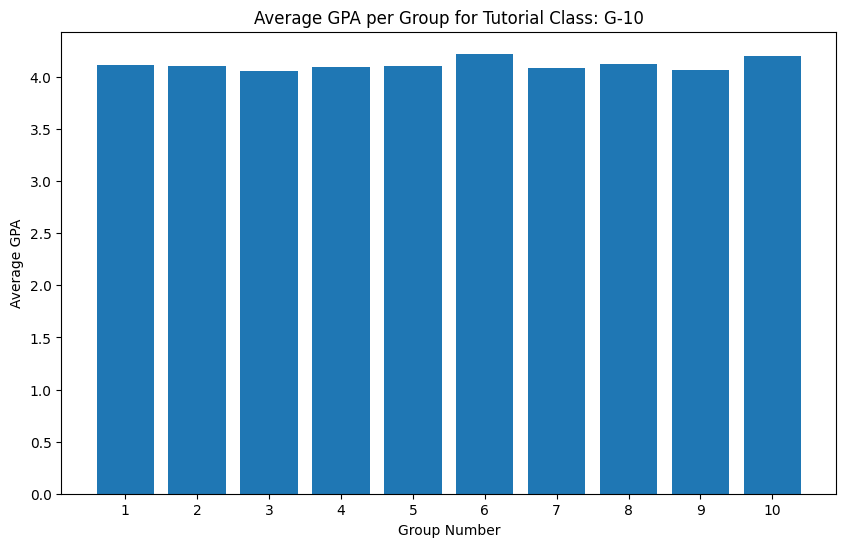

In [ ]:
import matplotlib.pyplot as plt

def getMean(arr):
    return sum(arr) / len(arr)

def getSD(mean, arr):
    sqdiff = 0.0
    for i in arr:
        sqdiff += (i - mean) ** 2
    return sqdiff / mean

content = open("FCEC_Team5_WongQianLong_G-10.csv", "r").readlines()
filter = "End of Group"
groups = {}

for line in range(len(content)):
    if line > 2 and filter not in content[line]:
        spl = content[line].split("|")
        spl[0] = spl[0].strip()
        spl[1] = spl[1].replace("\n", "")
        if spl[0] not in groups:
            groups.update({spl[0] : [spl[1]]})
        else:
            groups[spl[0]] = groups[spl[0]] + [spl[1]]

#print(groups)

avg = ["" for i in groups.keys()]
#print(avg)

for grp, members in groups.items():
    tmp = []
    for mm in members:
        tmp.append(float(mm.split(",")[5]))

    #print(avg)

    avg[int(grp)-1] = getMean(tmp)

#print(avg)
print("{:.5f}".format(getSD(getMean(avg), avg)))

plt.figure(figsize=(10, 6))
plt.bar(groups.keys(), avg)
plt.xlabel("Group Number")
plt.ylabel("Average GPA")
plt.title(f"Average GPA per Group for Tutorial Class: G-10")
plt.show()


#Results

The results of average(mean) CGPA for the tutorial group G-10 is as shown. With a variance of 0.00632 CGPA², it can be concluded that the algorithm is working within the threshold (default 2%).

# **S.P.A.M.**
##**S**mart **P**ersonalized **A**utomated **M**essaging

This is an automated messaging component of **C.L.A.S.S.**. It automatically takes the output files of **S.P.L.A.T.**, attaches the relevant documents for each tutor's tutorial group into Outlook and sends an email.

#Inputs:

*   {tutorial_group}.csv
*   tutors.csv

#Outputs:

*   Email Sent
*   Log Output





> **S.P.A.M.** utilises the default user account within Outlook on the running device to send the emails. Please check and change the *notDefault* flag to True along with *chosenUser* to match the device configuration.

A *log.txt* file will be outputted when the program finishes execution, containing the outcome of each message sent to the tutor, returning the result as a success or failure. If the result is a failure, it is due to an invalid tutorial group or email address within the *tutors.csv* file.

> **NOTE: This cannot be run inside hosted environments such as Google Colabatory, due to limitations of the *pywin32* library working only for Microsoft Outlook on Windows Systems.**



> **NOTE#2: Outlook(New) cannot be used as it no longer supports COM through the *pywin32* library, login to Outlook(Classic) to run this component.**






In [ ]:
!pip install --upgrade pywin32
#install pywin32 for win32com capabilities

In [ ]:
import win32com.client as win
import os

#if default user account is not the account you want to use, change this toggle
#and input the user account
notDefault = False
chosenUser = "" #your email here

log = open("maillog.txt", "w")
tutors = open("tutors.csv", "r").readlines()
#each tutor may have multiple tut grps, sample --> tutor_name_!tutor_email_!G-1,G-10,G-100
for i in tutors:
    #send the mail to tutor with attachments of all the tutorial_group.csv files
    #of tut groups they are in charge of
    tutorname, tutormail, tutlist = i.split("!")
    tutGroups = tutlist.split(",")
    for i in range(len(tutGroups)):
        tutGroups[i] = tutGroups[i].replace("\n", "")
    mailer = win.Dispatch('outlook.application')
    ns = mailer.GetNamespace("MAPI")
    if notDefault:
        for usermail in ns.Accounts:
            if usermail.SmtpAddress == chosenUser:
                mail = mailer.CreateItem(0)
                mail.To = tutormail
                mail.Subject = "Prof/TA " + tutorname + ":"
                #print(tutGroups)
                mail.Body = 'Here are the groups assigned to the tutorial groups under you.\n\nThank you.'
                for tut in tutGroups:
                  att = os.getcwd()+ "\\" + "FCEC_Team5_WongQianLong_" + tut + ".csv"
                  #print(att)
                  mail.Attachments.Add(att)
                try:
                  mail.Send()
                  log.write(f"Success! Sent to {tutorname} at {tutormail}\n")
                except:
                  #mail failed for whatever reason
                  log.write(f"Failed! Could not send to {tutorname} at {tutormail}\n")
    else:
        mail = mailer.CreateItem(0)
        mail.To = tutormail
        mail.Subject = "Prof/TA " + tutorname + ":"
        #print(tutGroups)
        mail.Body = 'Here are the groups assigned to the tutorial groups under you.\n\nThank you.'
        for tut in tutGroups:
          att = os.getcwd()+ "\\" + "FCEC_Team5_WongQianLong_" + tut + ".csv"
          #print(att)
          mail.Attachments.Add(att)
        try:
          mail.Send()
          log.write(f"Success! Sent to {tutorname} at {tutormail}\n")
        except:
          #mail failed for whatever reason
          log.write(f"Failed! Could not send to {tutorname} at {tutormail}\n")

ModuleNotFoundError: No module named 'win32com'

In [ ]:
!pip freeze > requirements.txt

Each team member should indicate either A or B.

A. I affirm that my contribution(s) to the lab work is my own, produced without help from any AI tool(s)

B. I affirm that my contribution(s) to the lab work has been produced with the help from AI tool(s)

| Full Name | Date | A or B |
| :---: | :---: | :---: |
|XXXX|9/11/2024|A|
|XXXX|9/11/2024|A|
|XXXX|9/11/2024|A|
|XXXX|9/11/2024|A|
|XXXX|9/11/2024|A|


By including this information in your jupyter notebook, you declare that the above affirmation made is true and that you have read and understood NTU's policy on the use
of AI tools.